In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

train_original = train.copy()
test_original = test.copy()

In [3]:
train.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [76]:
train.shape

(13320, 9)

In [5]:
test  = test.drop(['price'],axis=1)
test.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     1480 non-null   object 
 1   availability  1480 non-null   object 
 2   location      1480 non-null   object 
 3   size          1478 non-null   object 
 4   society       854 non-null    object 
 5   total_sqft    1480 non-null   object 
 6   bath          1473 non-null   float64
 7   balcony       1411 non-null   float64
dtypes: float64(2), object(6)
memory usage: 92.6+ KB


Univariate Analysis

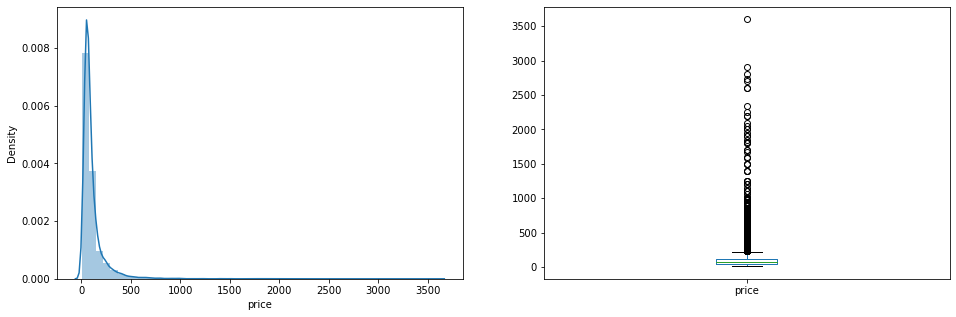

In [7]:
#TARGET VARIABLE
plt.figure(1)

plt.subplot(121)
sns.distplot(train['price'])    

plt.subplot(122)
train['price'].plot.box(figsize = (16,5))

plt.show()

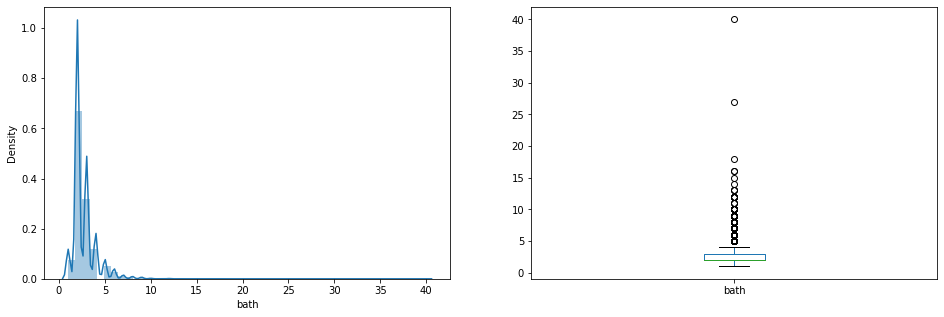

In [8]:
plt.figure(1)

plt.subplot(121)
sns.distplot(train['bath'])    

plt.subplot(122)
train['bath'].plot.box(figsize = (16,5))

plt.show()

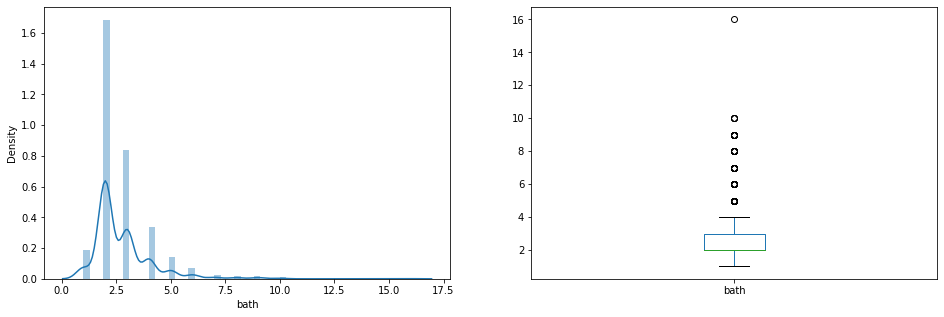

In [9]:
plt.figure(1)

plt.subplot(121)
sns.distplot(test['bath'])    

plt.subplot(122)
test['bath'].plot.box(figsize = (16,5))

plt.show()

In [10]:

#t = ['1234','834-892','233','283.083','827-937']
total_sqft = list(train.apply(lambda x: x[5], axis=1))
t1 = []
item_list = []
for item in total_sqft:
    if item.find("Sq. Meter") != -1:
         item = item.replace("Sq. Meter",'')
         t1.append(float(item) * 10.764) 
    elif item.find("Perch") != -1:
         item = item.replace("Perch",'')
         t1.append(float(item)*272.0) 
    elif item.find("Sq. Yards") != -1:
         item = item.replace("Sq. Yards",'')
         t1.append(float(item)*9.0) 
    elif item.find("Acres") != -1:
         item = item.replace("Acres",'')
         t1.append(float(item)*43560.0)
    elif item.find("Cents") != -1:
         item = item.replace("Cents",'')
         t1.append(float(item)*435.6)
    elif item.find("Guntha") != -1:
         item = item.replace("Guntha",'')
         t1.append(float(item)*1089.0)
    elif item.find("Grounds") != -1:
         item = item.replace("Grounds",'')
         t1.append(float(item)*2400.0)
    elif item.find('-') != -1:
         item_list = item.split('-')
         item_list = map(float,item_list)
         t1.append(sum(item_list)/2)
    else:
         t1.append(float(item))

train['total_Sqft_Modified'] = t1


In [11]:
total_sqft_test = list(test.apply(lambda x: x[5], axis=1))
t1 = []
item_list = []
for item in total_sqft_test:
    if item.find("Sq. Meter") != -1:
         item = item.replace("Sq. Meter",'')
         t1.append(float(item) * 10.764) 
    elif item.find("Perch") != -1:
         item = item.replace("Perch",'')
         t1.append(float(item)*272.0) 
    elif item.find("Sq. Yards") != -1:
         item = item.replace("Sq. Yards",'')
         t1.append(float(item)*9.0) 
    elif item.find("Acres") != -1:
         item = item.replace("Acres",'')
         t1.append(float(item)*43560.0)
    elif item.find("Cents") != -1:
         item = item.replace("Cents",'')
         t1.append(float(item)*435.6)
    elif item.find("Guntha") != -1:
         item = item.replace("Guntha",'')
         t1.append(float(item)*1089.0)
    elif item.find("Grounds") != -1:
         item = item.replace("Grounds",'')
         t1.append(float(item)*2400.0)
    elif item.find('-') != -1:
         item_list = item.split('-')
         item_list = map(float,item_list)
         t1.append(sum(item_list)/2)
    else:
         t1.append(float(item))

test['total_Sqft_Modified'] = t1

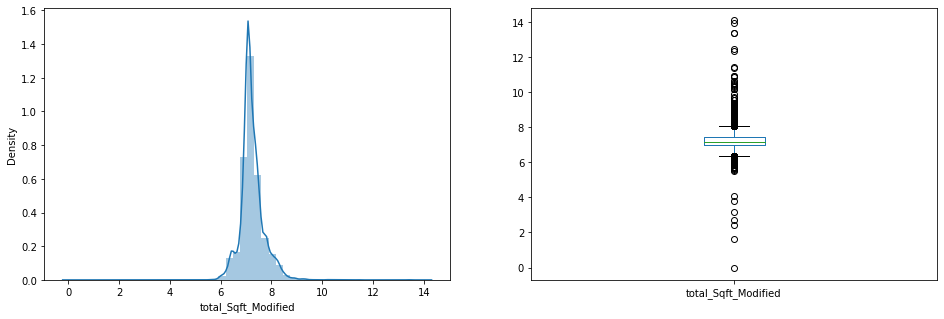

In [12]:
train['total_Sqft_Modified'] = np.log(train['total_Sqft_Modified'])
plt.figure(1)

plt.subplot(121)
sns.distplot(train['total_Sqft_Modified'])    

plt.subplot(122)
train['total_Sqft_Modified'].plot.box(figsize = (16,5))

plt.show()

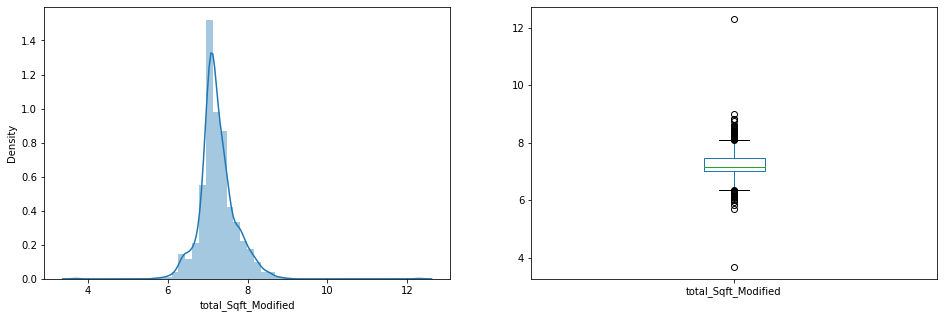

In [13]:
test['total_Sqft_Modified'] = np.log(test['total_Sqft_Modified'])
plt.figure(1)

plt.subplot(121)
sns.distplot(test['total_Sqft_Modified'])    

plt.subplot(122)
test['total_Sqft_Modified'].plot.box(figsize = (16,5))

plt.show()

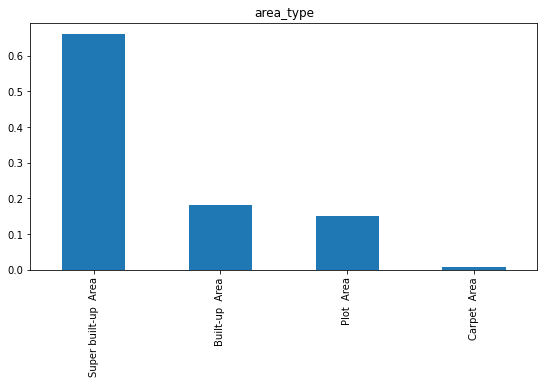

In [14]:
plt.figure(1)

plt.subplot(221)
train['area_type'].value_counts(normalize=True).plot.bar(figsize = (20,10), title="area_type")

plt.show()

In [75]:
train['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

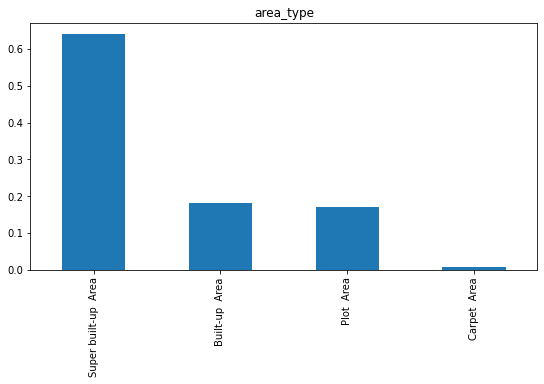

In [15]:
plt.figure(1)

plt.subplot(221)
test['area_type'].value_counts(normalize=True).plot.bar(figsize = (20,10), title="area_type")

plt.show()

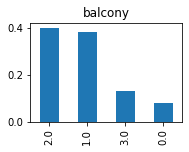

In [16]:
plt.figure(1)

#plt.subplot(223)
#train['society'].value_counts(normalize=True).plot.bar(figsize = (20,10),title="society")

plt.subplot(224)
train['balcony'].value_counts(normalize=True).plot.bar(title="balcony")

plt.show()

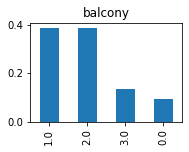

In [17]:
plt.figure(1)

#plt.subplot(223)
#train['society'].value_counts(normalize=True).plot.bar(figsize = (20,10),title="society")

plt.subplot(224)
test['balcony'].value_counts(normalize=True).plot.bar(title="balcony")

plt.show()

In [18]:
#availability	size	bath
pd.unique(train['availability'])

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [19]:
#availability	size	bath
pd.unique(test['availability'])

array(['Ready To Move', '18-Apr', '18-Dec', '18-Jul', '19-Dec', '19-Oct',
       '17-Dec', '18-May', '22-Jun', '18-Feb', '18-Aug', '18-Jun',
       '18-Mar', '20-Dec', '17-Jun', '21-Mar', '17-Jul', '15-Oct',
       'Immediate Possession', '19-Sep', '17-Jan', '19-Jun', '21-May',
       '22-May', '18-Oct', '18-Sep', '21-Dec', '18-Nov', '17-Nov',
       '19-Jan', '17-May', '19-Mar', '17-Sep', '17-Apr', '20-Jul',
       '19-Nov', '21-Jan', '21-Feb', '20-Jun', '19-May', '21-Jul',
       '20-Jan', '18-Jan', '19-Feb', '19-Aug', '16-Jul', '19-Jul',
       '17-Aug', '21-Jun', '16-Apr', '20-Aug'], dtype=object)

In [20]:
availability = list(train.apply(lambda x: x[1], axis=1))
t1 = []
item_list = []
for item in availability:
    if item.find("Immediate Possession") != -1 or item.find("Ready To Move") != -1:
         t1.append(0) 
    elif item.find('Jan') != -1:
         t1.append(1) 
    elif item.find('Feb') != -1:
         t1.append(2) 
    elif item.find('Mar') != -1:
         t1.append(3) 
    elif item.find('Apr') != -1:
         t1.append(4) 
    elif item.find('May') != -1:
         t1.append(5) 
    elif item.find('Jun') != -1:
         t1.append(6)
    elif item.find('Jul') != -1:
         t1.append(7)
    elif item.find('Aug') != -1:
         t1.append(8)
    elif item.find('Sep') != -1:
         t1.append(9)                              
    elif item.find('Oct') != -1:
         t1.append(10)
    elif item.find('Nov') != -1:
         t1.append(11)
    elif item.find('Dec') != -1:
         t1.append(12)       
    else:
         t1.append(-1)
train['availabilty_Month'] = t1


In [21]:
availability_test = list(test.apply(lambda x: x[1], axis=1))
t1 = []
item_list = []
for item in availability_test:
    if item.find("Immediate Possession") != -1 or item.find("Ready To Move") != -1:
         t1.append(0) 
    elif item.find('Jan') != -1:
         t1.append(1) 
    elif item.find('Feb') != -1:
         t1.append(2) 
    elif item.find('Mar') != -1:
         t1.append(3) 
    elif item.find('Apr') != -1:
         t1.append(4) 
    elif item.find('May') != -1:
         t1.append(5) 
    elif item.find('Jun') != -1:
         t1.append(6)
    elif item.find('Jul') != -1:
         t1.append(7)
    elif item.find('Aug') != -1:
         t1.append(8)
    elif item.find('Sep') != -1:
         t1.append(9)                              
    elif item.find('Oct') != -1:
         t1.append(10)
    elif item.find('Nov') != -1:
         t1.append(11)
    elif item.find('Dec') != -1:
         t1.append(12)       
    else:
         t1.append(-1)
test['availabilty_Month'] = t1

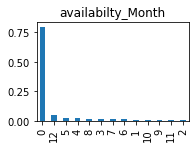

In [22]:
plt.figure(1)

plt.subplot(224)
train['availabilty_Month'].value_counts(normalize=True).plot.bar(title="availabilty_Month")

plt.show()

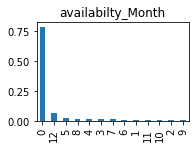

In [23]:
plt.figure(1)

plt.subplot(224)
test['availabilty_Month'].value_counts(normalize=True).plot.bar(title="availabilty_Month")

plt.show()

In [24]:
pd.unique(train['size'])

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [25]:
pd.unique(test['size'])

array(['2 BHK', '9 Bedroom', '4 Bedroom', '3 BHK', '4 BHK', '1 BHK',
       '3 Bedroom', '1 Bedroom', '2 Bedroom', '5 Bedroom', '7 BHK',
       '8 Bedroom', '6 Bedroom', nan, '7 Bedroom', '1 RK', '5 BHK',
       '9 BHK', '6 BHK', '8 BHK', '10 Bedroom', '16 Bedroom'],
      dtype=object)

In [26]:
size = list(train.apply(lambda x: x[3], axis=1))
t1 = []
for item in size: 
    if pd.isnull(item):
        t1.append(-1)
    elif item.find('BHK') != -1:
        item = item.replace('BHK','')
        t1.append(float(item))
         #print(item)
    elif item.find('Bedroom') != -1:
        item = item.replace('Bedroom','')
        t1.append(float(item)) 
        #print(t1)
    elif item.find('RK') != -1:
        item = item.replace('RK','')
        t1.append(float(item))   
        #print(t1)
    else:
        print(item)
        t1.append(item)
        #print(t1)    
train['size_modified'] = t1

In [27]:
size_test = list(test.apply(lambda x: x[3], axis=1))
t1 = []
for item in size_test: 
    if pd.isnull(item):
        t1.append(-1)
    elif item.find('BHK') != -1:
        item = item.replace('BHK','')
        t1.append(float(item))
         #print(item)
    elif item.find('Bedroom') != -1:
        item = item.replace('Bedroom','')
        t1.append(float(item)) 
        #print(t1)
    elif item.find('RK') != -1:
        item = item.replace('RK','')
        t1.append(float(item))   
        #print(t1)
    else:
        print(item)
        t1.append(item)
        #print(t1)    
test['size_modified'] = t1

In [28]:
pd.unique(train['bath'])

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [29]:
pd.unique(test['bath'])

array([ 2.,  9.,  5.,  3.,  4.,  6., 10.,  1.,  7., nan,  8., 16.])

In [30]:
bins = [0,5,8,12]
groups = ['Standard','Premium','Luxury']
train['bath_bin'] = pd.cut(train['bath'],bins,labels=groups)

In [31]:
bins = [0,5,8,12]
groups = ['Standard','Premium','Luxury']
test['bath_bin'] = pd.cut(test['bath'],bins,labels=groups)

In [32]:
train['location'].fillna(train['location'].mode()[0], inplace=True)
train['society'].fillna(train['society'].mode()[0], inplace=True)
test['location'].fillna(test['location'].mode()[0], inplace=True)
test['society'].fillna(test['society'].mode()[0], inplace=True)

In [33]:
train = train.drop(['availability','size','total_sqft','bath'],axis=1)

In [34]:
test = test.drop(['availability','size','total_sqft','bath'],axis=1)

In [35]:
train['balcony'].fillna(train['balcony'].median(), inplace=True)
train['bath_bin'].fillna(train['bath_bin'].mode()[0], inplace=True)

In [36]:
test['balcony'].fillna(test['balcony'].median(), inplace=True)
test['bath_bin'].fillna(test['bath_bin'].mode()[0], inplace=True)

In [37]:
train.isna().sum()

area_type              0
location               0
society                0
balcony                0
price                  0
total_Sqft_Modified    0
availabilty_Month      0
size_modified          0
bath_bin               0
dtype: int64

In [38]:
test.isna().sum()

area_type              0
location               0
society                0
balcony                0
total_Sqft_Modified    0
availabilty_Month      0
size_modified          0
bath_bin               0
dtype: int64

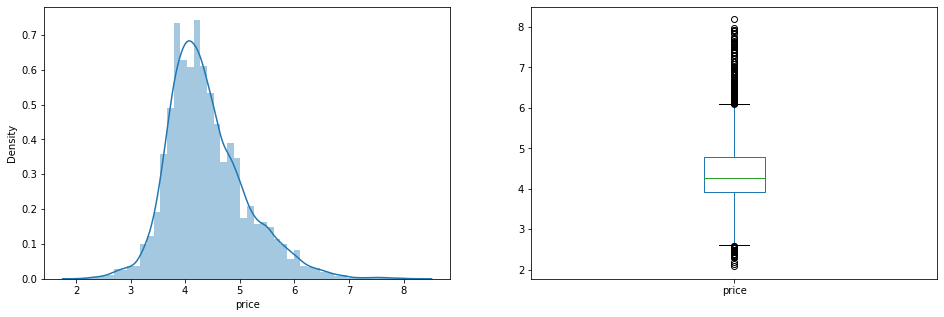

In [39]:
#Making the skewed chart normal by taking log
train['price'] = np.log(train['price'])
plt.figure(1)

plt.subplot(121)
sns.distplot(train['price'])    

plt.subplot(122)
train['price'].plot.box(figsize = (16,5))

plt.show()

In [40]:
train.head(10)

,area_type,location,society,balcony,price,total_Sqft_Modified,availabilty_Month,size_modified,bath_bin
0,Super built-up Area,Electronic City Phase II,Coomee,1.0,3.665355,6.962243,12,2.0,Standard
1,Plot Area,Chikka Tirupathi,Theanmp,3.0,4.787492,7.863267,0,4.0,Standard
2,Built-up Area,Uttarahalli,GrrvaGr,3.0,4.127134,7.272398,0,3.0,Standard
3,Super built-up Area,Lingadheeranahalli,Soiewre,1.0,4.553877,7.327123,0,3.0,Standard
4,Super built-up Area,Kothanur,GrrvaGr,1.0,3.931826,7.090077,0,2.0,Standard
5,Super built-up Area,Whitefield,DuenaTa,1.0,3.637586,7.064759,0,2.0,Standard
6,Super built-up Area,Old Airport Road,Jaades,2.0,5.318120,7.912789,5,4.0,Standard
7,Super built-up Area,Rajaji Nagar,Brway G,2.0,6.396930,8.101678,0,4.0,Standard
8,Super built-up Area,Marathahalli,GrrvaGr,1.0,4.147095,7.177782,0,3.0,Standard
9,Plot Area,Gandhi Bazar,GrrvaGr,2.0,5.913503,6.927558,0,6.0,Premium


In [41]:
train1 = train.drop(['balcony','price',	'total_Sqft_Modified',	'availabilty_Month',	'size_modified'],axis=1)
#dummies = pd.get_dummies(train1)

In [42]:
test1 = test.drop(['balcony','total_Sqft_Modified',	'availabilty_Month',	'size_modified'],axis=1)

In [43]:
#dummies.head()
cat_columns = ['area_type','location','society','bath_bin'] 
for col in train1.columns: 
   if col in cat_columns: 
      train1[col] = train1[col].astype('category') 
      train1[col] = train1[col].cat.codes

train1.head()

,area_type,location,society,bath_bin
0,3,419,464,0
1,2,317,2439,0
2,0,1179,806,0
3,3,757,2186,0
4,3,716,806,0


In [44]:
cat_columns = ['area_type','location','society','bath_bin'] 
for col in test1.columns: 
   if col in cat_columns: 
      test1[col] = test1[col].astype('category') 
      test1[col] = test1[col].cat.codes

test1.head()

,area_type,location,society,bath_bin
0,3,95,404,0
1,2,30,57,2
2,2,185,441,0
3,3,269,589,0
4,3,274,26,0


In [45]:
train2 = train.drop(['area_type','location','society','bath_bin'],axis=1)
df = pd.concat([train1,train2],axis=1)
df.head()

,area_type,location,society,bath_bin,balcony,price,total_Sqft_Modified,availabilty_Month,size_modified
0,3,419,464,0,1.0,3.665355,6.962243,12,2.0
1,2,317,2439,0,3.0,4.787492,7.863267,0,4.0
2,0,1179,806,0,3.0,4.127134,7.272398,0,3.0
3,3,757,2186,0,1.0,4.553877,7.327123,0,3.0
4,3,716,806,0,1.0,3.931826,7.090077,0,2.0


In [46]:
test2 = test.drop(['area_type','location','society','bath_bin'],axis=1)
df_test = pd.concat([test1,test2],axis=1)
df_test.head()

,area_type,location,society,bath_bin,balcony,total_Sqft_Modified,availabilty_Month,size_modified
0,3,95,404,0,2.0,7.110696,0,2.0
1,2,30,57,2,2.0,7.783224,0,9.0
2,2,185,441,0,2.0,7.408531,4,4.0
3,3,269,589,0,1.0,7.186901,0,3.0
4,3,274,26,0,1.0,7.057037,0,2.0


In [47]:
from pandas import Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

In [48]:
X = df.drop(['price'],1)

In [49]:
x_train = X
y_train = df.price
x_test = df_test

In [50]:
lreg.fit(x_train,y_train)

LinearRegression()

In [51]:
#predict on cv
pred_cv = lreg.predict(x_test)

In [52]:
#mse
#mse = np.mean((pred_cv - y_cv) ** 2)
#mse

In [53]:
#r square
#lreg.score(x_cv,y_cv)

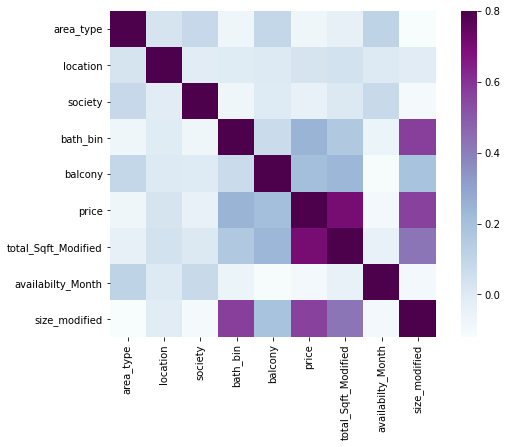

In [54]:
matrix = df.corr()
f, ax = plt.subplots(figsize = (9,6))
sns.heatmap(matrix, vmax=0.8, square=True, cmap="BuPu")

In [74]:
matrix

,area_type,location,society,bath_bin,balcony,price,total_Sqft_Modified,availabilty_Month,size_modified
area_type,1.000000,0.033179,0.086729,-0.075545,0.091440,-0.075646,-0.032353,0.112143,-0.120815
location,0.033179,1.000000,-0.006943,-0.002550,0.003049,0.030511,0.039757,0.007943,-0.008340
society,0.086729,-0.006943,1.000000,-0.074999,-0.000579,-0.043459,0.010405,0.077497,-0.106193
bath_bin,-0.075545,-0.002550,-0.074999,1.000000,0.071855,0.247309,0.162245,-0.059846,0.574490
balcony,0.091440,0.003049,-0.000579,0.071855,1.000000,0.207785,0.241333,-0.110888,0.192035
price,-0.075646,0.030511,-0.043459,0.247309,0.207785,1.000000,0.704325,-0.093145,0.568016
total_Sqft_Modified,-0.032353,0.039757,0.010405,0.162245,0.241333,0.704325,1.000000,-0.038920,0.427345
availabilty_Month,0.112143,0.007943,0.077497,-0.059846,-0.110888,-0.093145,-0.038920,1.000000,-0.092251
size_modified,-0.120815,-0.008340,-0.106193,0.574490,0.192035,0.568016,0.427345,-0.092251,1.000000


In [55]:
df_pred = pd.DataFrame(np.exp(pred_cv), columns = ['price'])
df_pred.head()

,price
0,63.341167
1,317.700564
2,116.716449
3,81.568544
4,60.811930


In [56]:
df_pred.to_csv('sub1.csv')

Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
RFmodel = RandomForestRegressor(n_estimators=1000)

In [59]:
RFmodel.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1000)

In [60]:
predicted = RFmodel.predict(x_test)

In [61]:
df_pred1 = pd.DataFrame(np.exp(predicted), columns = ['price'])
df_pred1.head()

,price
0,69.612371
1,513.107571
2,264.684067
3,47.826408
4,48.204333


In [62]:
df_pred1.to_csv('sub2.csv')

### Ridge and Lasso

In [63]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_reg = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_reg.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [64]:
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

{'alpha': 55}
-0.21853459734358874


In [72]:
predicted = ridge_reg.predict(x_test)
df_pred1 = pd.DataFrame(np.exp(predicted), columns = ['price'])
df_pred1.head()

,price
0,63.385384
1,325.189660
2,116.365137
3,81.422753
4,60.784701


In [67]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_reg = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_reg.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [69]:
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

{'alpha': 0.001}
-0.21866620004702045


In [70]:
predicted = lasso_reg.predict(x_test)
df_pred1 = pd.DataFrame(np.exp(predicted), columns = ['price'])
df_pred1.head()

,price
0,63.441019
1,330.697267
2,116.009915
3,81.505263
4,60.972176


In [73]:
df_pred1.to_csv('sub4_r.csv')